<a href="https://colab.research.google.com/github/Rlaeodudslak/INU-3-1-internet/blob/master/%EC%B5%9C%EC%A2%85%EB%B3%B8_%EC%88%98%EC%A0%95(CNN%EA%B8%B0%EB%B0%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

최종본 코드 기반으로 작성
train 시 5분 test 시 10분

In [ ]:
import torch
import torch.nn as nn #뉴럴 네트워크를 생성하기 위한 패키지
import torch.nn.functional as F #torch.nn라이브러리의 모든 *함수*가 포함(컨볼루션,손실함수,활성화함수 등...)
import torch.optim as optim #각 매개변수를 수동으로 업데이트 하는것이 아닌,optim.step() optim.zero_grad()를 통해 간편하게 업데이트 가능
from google.colab import drive #구글드라이브와 mount하기 위한 라이브러리
import matplotlib.pyplot as plt #tensor 또는 array의 값을 
import torchvision.transforms as transforms
import cv2
from google.colab.patches import cv2_imshow
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision import datasets, transforms
from IPython.display import display

drive.mount('/content/gdrive')#content/gdrive 라는 폴더를 만들어서 그 안에 내 구글드라이브 자료들을 삽입한다
torch.manual_seed(1)#랜덤 시드를 준다


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 새 섹션

In [ ]:
# 영상의 의미지를 연속적으로 캡쳐할 수 있게 하는 class
vidcap = cv2.VideoCapture('/content/gdrive/MyDrive/한이음 project/부분이행영상(9,9,9,7).mp4')

count = 0
ret=True
while (ret==True):
  ret, image = vidcap.read()
  if(int(vidcap.get(1)) % 10 == 0 and ret==True): 
     dst = image[200:1000,900:1700].copy() #이미지 크기를 잘라낸거 
     dst = cv2.resize(dst, dsize=(0, 0), fx=0.15, fy=0.15, interpolation=cv2.INTER_LINEAR) # 0.15배 감소
     length='0'*(5-len(str(count)))+str(count) #저장되는 이름을 바꾸려고 한건데 0,1,10,100,1000,1001  00001 00002    
     cv2.imwrite("/content/gdrive/MyDrive/한이음 project/이미지모음/부분시행/부분시행image/%s.jpg"% length,dst) 
     print("%s saved"%length)
     count += 1 
vidcap.release()
print("\nEXIT VIDEO CUT\n")

00000 saved
00001 saved
00002 saved
00003 saved
00004 saved
00005 saved
00006 saved
00007 saved
00008 saved
00009 saved
00010 saved
00011 saved
00012 saved
00013 saved
00014 saved
00015 saved
00016 saved
00017 saved
00018 saved
00019 saved
00020 saved
00021 saved
00022 saved
00023 saved
00024 saved
00025 saved
00026 saved
00027 saved
00028 saved
00029 saved
00030 saved
00031 saved
00032 saved
00033 saved
00034 saved
00035 saved
00036 saved
00037 saved
00038 saved
00039 saved
00040 saved
00041 saved
00042 saved
00043 saved
00044 saved
00045 saved
00046 saved
00047 saved
00048 saved
00049 saved
00050 saved
00051 saved
00052 saved
00053 saved
00054 saved
00055 saved
00056 saved
00057 saved
00058 saved
00059 saved
00060 saved
00061 saved
00062 saved
00063 saved
00064 saved
00065 saved
00066 saved
00067 saved
00068 saved
00069 saved
00070 saved
00071 saved
00072 saved
00073 saved
00074 saved
00075 saved
00076 saved
00077 saved
00078 saved
00079 saved
00080 saved
00081 saved
00082 saved
0008

In [ ]:
transform= transforms.Compose([ 
                              transforms.ToTensor(),
                              transforms.Grayscale(1)
                              ])#데이터 셋에 넣을때, 이미지를 텐서화 하고, 또한 1차원 GrayScale하고 넣기위한 코드
train_datasets=datasets.ImageFolder('/content/gdrive/MyDrive/한이음 project/이미지모음/훈련집합', transform=transform)#훈련집합/일반image index=0 훈련집합/출발선image index=1
train_loader = DataLoader(train_datasets, batch_size=256, shuffle=True) #2100개이미지 배치사이즈=32 2100/32 
test_datasets=datasets.ImageFolder('/content/gdrive/MyDrive/한이음 project/이미지모음/완전시행', transform=transform)
test_loader=DataLoader(test_datasets,batch_size=256,shuffle=False)

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')

in_channels: 입력 채널 수, 흑백 이미지일 경우 1</br>
out_channels: 출력 채널 수</br>
kernel_size: 커널 사이즈</br>
stride: stride 사이즈</br>
padding: padding 사이즈

</br>
나머지 파라미터는 아직 이해 X

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.keep_prob = 0.5
    self.layer1 = torch.nn.Sequential(
      torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
      torch.nn.ReLU(),
      torch.nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer2 = torch.nn.Sequential(
      torch.nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
      torch.nn.ReLU(),
      torch.nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.layer3 = torch.nn.Sequential(
      torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
      torch.nn.ReLU(),
      torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
      )
 #layer3 fc2 def forward~~   
    self.fc1 = torch.nn.Linear(4*4 * 4 * 128, 625, bias=True)
    torch.nn.init.xavier_uniform_(self.fc1.weight)
    self.layer4 = torch.nn.Sequential(
      self.fc1,
      torch.nn.ReLU(),
      torch.nn.Dropout(p=1 - self.keep_prob))
    # L5 Final FC 625 inputs -> 10 outputs
    self.fc2 = torch.nn.Linear(625, 2, bias=True)
    torch.nn.init.xavier_uniform_(self.fc2.weight)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = out.view(out.size(0), -1)   # Flatten them for FC
    out = self.layer4(out)
    out = self.fc2(out)
    return out



In [ ]:
model = CNN()
optimizer=optim.Adam(model.parameters(),lr=0.01) 
loss_fn=nn.CrossEntropyLoss() 
losses=[]

BATCH:1/3 Epoch:0/50  Cost: 0.632090
BATCH:2/3 Epoch:0/50  Cost: 48.980747
BATCH:3/3 Epoch:0/50  Cost: 0.116586
16.576474204659462
BATCH:1/3 Epoch:1/50  Cost: 0.300192
BATCH:2/3 Epoch:1/50  Cost: 0.254699
BATCH:3/3 Epoch:1/50  Cost: 1.957817
0.8375694354375204
BATCH:1/3 Epoch:2/50  Cost: 0.252341
BATCH:2/3 Epoch:2/50  Cost: 0.438160
BATCH:3/3 Epoch:2/50  Cost: 0.430433
0.3736444115638733
BATCH:1/3 Epoch:3/50  Cost: 0.277698
BATCH:2/3 Epoch:3/50  Cost: 0.312247
BATCH:3/3 Epoch:3/50  Cost: 0.432916
0.3409537474314372
BATCH:1/3 Epoch:4/50  Cost: 0.275934
BATCH:2/3 Epoch:4/50  Cost: 0.249399
BATCH:3/3 Epoch:4/50  Cost: 0.232254
0.25252891580263775
BATCH:1/3 Epoch:5/50  Cost: 0.272355
BATCH:2/3 Epoch:5/50  Cost: 0.244663
BATCH:3/3 Epoch:5/50  Cost: 0.190753
0.23592371245225272
BATCH:1/3 Epoch:6/50  Cost: 0.312729
BATCH:2/3 Epoch:6/50  Cost: 0.242729
BATCH:3/3 Epoch:6/50  Cost: 0.125677
0.2270450939734777
BATCH:1/3 Epoch:7/50  Cost: 0.272142
BATCH:2/3 Epoch:7/50  Cost: 0.268706
BATCH:3/3 Epo

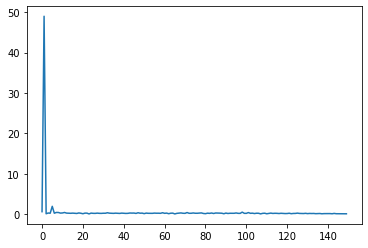

In [ ]:
model.train()
check = True
epoch=50
for epoc in range(epoch):
  error_sum = 0
  ccount = 0
  for i, data in enumerate(train_loader): #train_loaer=데이터로더 = dataset
        inputs, labels = data #data=이미지,index 
        y_pred = model(inputs)
        loss = loss_fn(y_pred,labels)#labels=[0,0,1,1,0,0....2157개] y_pred=[[a,b],[c,d]...2157개]   label에 1이 안들어가 있으면.,loss는 무조건 0이뜸
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        print('BATCH:{}/{} Epoch:{}/{}  Cost: {:.6f}'.format(i+1,len(train_loader),epoc,epoch ,loss.item()) )
        error_sum += loss.item()
        ccount+= 1
  cerror = error_sum/ccount
  print(cerror)
  if cerror < 0.3 and check == True:
    optimizer = optim.Adam(model.parameters(), lr= 0.001)
    check = False   #optimizer1 optimizer2 optimizer1  
  if cerror < 0.1:
    break
plt.plot(losses)


In [ ]:
model.eval() #model = 훈련이 완료 된 모델
with torch.no_grad():
 for i, data in enumerate(test_loader): 
  inputs, labels = data #data=이미지,index 
  y_pred = model(inputs)
  if i==0:
   result=torch.tensor(y_pred)
  else:
   result=torch.cat([result,y_pred])
   print('BATCH:{}/{}'.format(i+1,len(test_loader)))
  print(result.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


torch.Size([256, 2])
BATCH:2/9
torch.Size([512, 2])
BATCH:3/9
torch.Size([768, 2])
BATCH:4/9
torch.Size([1024, 2])
BATCH:5/9
torch.Size([1280, 2])
BATCH:6/9
torch.Size([1536, 2])
BATCH:7/9
torch.Size([1792, 2])
BATCH:8/9
torch.Size([2048, 2])
BATCH:9/9
torch.Size([2157, 2])


인덱스번호: 43 count: 1



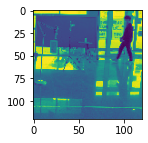

인덱스번호: 697 count: 2



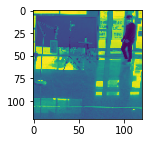

인덱스번호: 777 count: 3



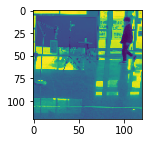

인덱스번호: 839 count: 4



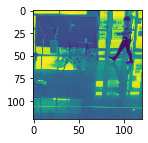

인덱스번호: 1068 count: 5



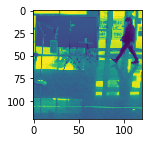

인덱스번호: 1509 count: 6



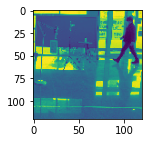

인덱스번호: 1723 count: 7



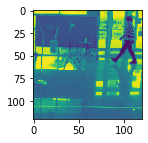

인덱스번호: 1813 count: 8



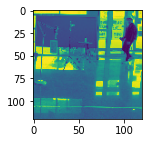

인덱스번호: 1879 count: 9



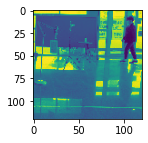

인덱스번호: 2097 count: 10



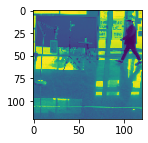

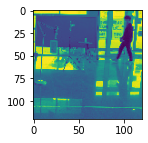

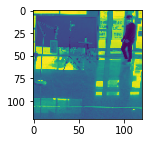

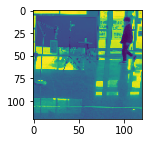

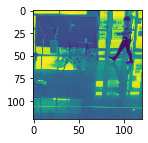

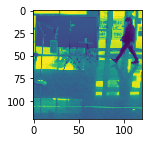

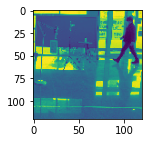

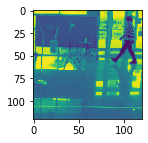

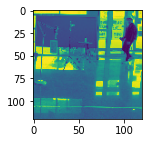

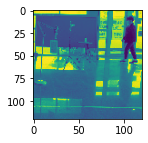

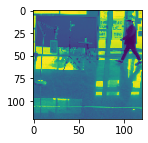

In [ ]:
result_amax=torch.argmax(result,1)
count=0
for label,image in enumerate(test_datasets):
   if result_amax[label]==1:
      count=count+1
      print('인덱스번호: {} count: {}\n'.format(label,count))
      fig, ax = plt.subplots(figsize=(3,2))
      ax.imshow(image[0].squeeze())
      display(fig)
      result_amax[label+1]=0
      result_amax[label+2]=0
      result_amax[label+3]=0